# Bi 621 – Problem Set 4
## Due before class, Thursday, July 13

Our goal with this assignment is to assess the overall quality of a lane of Illumina sequencing data. We will be working with (part of) a lane of 101bp long Illumina sequence data. Our first goal is to calculate the average quality score along each of the 101bp of data we have. Once that is complete, we will extend our calculations to include variance and standard deviation, and in part 3, the median. Finally, you will calculate and then plot the distribution of quality scores at two particular basepair positions.

This assigment will take you through the algorithms step-wise. In the real world, you would update the original code to add functionality. However, since this is auto-graded, please "write new code" for each step instead of simply updating the code you have written previously.

#### Part 1
1. Copy the file ```lane1_NoIndex_L001_R1_003.fastq.gz``` from HPC to the folder **directly above** PS4 folder and reference it with the relative file path (the automated grading will fail if you do not follow this direction). This file contains 4 million Illumina reads from a stickleback experiment.
2. Create an array called ```mean_scores``` that contains 101 elements, each a float value initialized to ```0.0```.

In [1]:
mean_scores = []
for i in range(101):
    mean_scores.append(0.0)
#print (mean_scores)
#int((4/4)-1)
print (mean_scores[100])

0.0


# <font color=red> The next cell contains tests for the autograder. Do not change!

In [2]:
assert len(mean_scores) == 101
assert mean_scores[54] == 0.0

3. Open the FASTQ file and loop through every record (*recommend testing your code with a smaller subsample of the file*). Convert the Phred quality score from a letter to its corresponding number and add it to an ongoing sum of the quality scores for each base pair. So, the quality score of the first nucleotide of every read will be summed together in position 0 of the array you create. Likewise, the quality scores of the 101th nucleotide will be stored in position 100 of the array.
4. Keep a counter called ```NR``` to keep track of the total number of lines in the file.

In [3]:
my_file=open("../lane1_NoIndex_L001_R1_003.fastq")
quality_lines = []

NR = 0

#To convert phred scores to numbers
def convert_phred(letter):
    """Converts a single character into a phred score"""
    QScore = ord(letter) - 33
    return QScore

#Populate the mean scores
for lines in my_file:
    NR = NR + 1
    if NR%500000==0:
        print (NR)
    if NR%4 == 0:
        quality_lines.append(lines)
        for i in range((len(lines)-1)):
            mean_scores[i] = mean_scores[i] + convert_phred(lines[i])

#Some quality assurance
print(NR)
print (mean_scores)
my_file.close()

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
7500000
8000000
8500000
9000000
9500000
10000000
10500000
11000000
11500000
12000000
12500000
13000000
13500000
14000000
14500000
15000000
15500000
16000000
16000000
[128569832.0, 129955000.0, 130152756.0, 143193097.0, 142560058.0, 142735776.0, 144147154.0, 144874873.0, 152909739.0, 152231586.0, 152684471.0, 152606648.0, 148525137.0, 153908471.0, 153802650.0, 153048642.0, 153073269.0, 152871222.0, 152541135.0, 152340346.0, 152328419.0, 151711954.0, 151722802.0, 151667570.0, 151069689.0, 151104371.0, 150687769.0, 150403702.0, 150064290.0, 149549938.0, 149350552.0, 149843901.0, 150173777.0, 149896596.0, 149709729.0, 149494051.0, 149042583.0, 148731300.0, 148612738.0, 148081339.0, 148018035.0, 147751809.0, 147325106.0, 146737857.0, 146142046.0, 145433175.0, 145113295.0, 144383287.0, 143416343.0, 142914506.0, 142617221.0, 141531748.0, 141050749.0, 140439299.0, 139813864.0, 1390218

# <font color=red> The next cell contains tests for the autograder. Do not change!

In [5]:
assert len(mean_scores) == 101
assert mean_scores[54] == 139813864.0
assert mean_scores[70] == 129508774.0

1.	Once you have completed summing the quality values, you will calculate the mean quality value at each base and store it back in the array at the appropriate position.
2.	Finally, you will print to the terminal the mean quality scores from the Illumina reads, like this:
```
# Base Pair	Mean Quality Score
0		33.8
1		27.2
2		31.9
...
```
3.	Plot these results any way you know how: using Excel, R, gnuplot... 

    **Challenge** - plot these results inline in your Jupyter Notebook.
> *Hint* - if tackling the challenge, look into matplotlib and the "magic" command 
```
% matplotlib inline
```


In [6]:
for i in range(101):
    mean_scores[i]=mean_scores[i]/4000000
print ("# Base Pair","\t","Mean Quality Score")
for i in range(101):
    print(i,"\t",mean_scores[i])

# Base Pair 	 Mean Quality Score
0 	 32.142458
1 	 32.48875
2 	 32.538189
3 	 35.79827425
4 	 35.6400145
5 	 35.683944
6 	 36.0367885
7 	 36.21871825
8 	 38.22743475
9 	 38.0578965
10 	 38.17111775
11 	 38.151662
12 	 37.13128425
13 	 38.47711775
14 	 38.4506625
15 	 38.2621605
16 	 38.26831725
17 	 38.2178055
18 	 38.13528375
19 	 38.0850865
20 	 38.08210475
21 	 37.9279885
22 	 37.9307005
23 	 37.9168925
24 	 37.76742225
25 	 37.77609275
26 	 37.67194225
27 	 37.6009255
28 	 37.5160725
29 	 37.3874845
30 	 37.337638
31 	 37.46097525
32 	 37.54344425
33 	 37.474149
34 	 37.42743225
35 	 37.37351275
36 	 37.26064575
37 	 37.182825
38 	 37.1531845
39 	 37.02033475
40 	 37.00450875
41 	 36.93795225
42 	 36.8312765
43 	 36.68446425
44 	 36.5355115
45 	 36.35829375
46 	 36.27832375
47 	 36.09582175
48 	 35.85408575
49 	 35.7286265
50 	 35.65430525
51 	 35.382937
52 	 35.26268725
53 	 35.10982475
54 	 34.953466
55 	 34.7554745
56 	 34.56416725
57 	 34.24859675
58 	 34.069572
59 	 33.8504297

In [7]:
#Use this cell to generate your plot in Jupyter.
#Otherwise, issue a print statement so that the name of your plot file is printed.

print("PS4_Mean_QS.pdf")

PS4_Mean_QS.pdf


# Part 2 – Extended statistics 

Calculate the variance and the standard deviation for each position in the Illumina reads. Do not use any statistics packages for this assigment.

1.	You will now create two additional arrays of the same size, one to hold the variance (called ```var```) and one to hold the standard deviation (called ```stdev```) for each position in the read.
2. Modify your print code to include two additional columns to print the variance and standard deviation along with the mean. Include the standard deviation in a new plot.

The mean is 34.34788233663367
# Base Pair 	 Mean Quality Score 	 Variance 	 Standard Deviation
0 		 32.142458 	 12.952700218371163 	 3.598985998635055
1 		 32.48875 	 10.880134937695138 	 3.2985049549296024
2 		 32.538189 	 10.222612600400359 	 3.197282064566772
3 		 35.79827425 	 13.607210971709382 	 3.688795327977602
4 		 35.6400145 	 16.405214938805866 	 4.050335163761867
5 		 35.683944 	 16.74728160598006 	 4.092344267773676
6 		 36.0367885 	 7.815591605858491 	 2.7956379604409602
7 		 36.21871825 	 8.036954576788029 	 2.8349523059106354
8 		 38.22743475 	 10.666837684751082 	 3.266012505296188
9 		 38.0578965 	 12.03730649490885 	 3.469482165238618
10 		 38.17111775 	 11.333607464793001 	 3.36654236046318
11 		 38.151662 	 11.807116137183005 	 3.4361484451610944
12 		 37.13128425 	 27.840401696013693 	 5.276400448792121
13 		 38.47711775 	 36.09485990234785 	 6.0078997913037675
14 		 38.4506625 	 36.93192431221588 	 6.077164166962735
15 		 38.2621605 	 40.84198987312479 	 6.390773

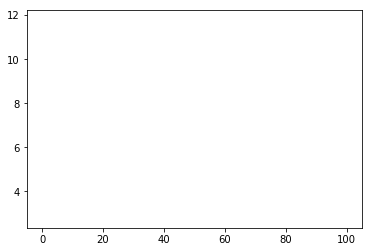

In [8]:
my_file=open("../lane1_NoIndex_L001_R1_003.fastq")

NR = 0
var=[]
stdev=[]

from math import sqrt

#Find mean for whole position data set
mean=0
mean = sum(mean_scores) / len(mean_scores)

print("The mean is",mean)

#Make the variance and stdev lists
for i in range(101):
    var.append(0)
    stdev.append(0)

#Calculate the variance of the data set
for i in range(101):
    qualitylist=[]
    for lines in quality_lines:
        qualitylist.append(convert_phred(lines[i]))
    var[i] = sum([(scores-mean_scores[i])**2 for scores in qualitylist])/((len(qualitylist)))

#Calculate the stdev of data set
for i in range(101):
    stdev[i]=sqrt(var[i])

#Print my tables
print ("# Base Pair","\t","Mean Quality Score","\t","Variance","\t","Standard Deviation")
for i in range(101):
    print(i,"\t\t",mean_scores[i],"\t",var[i],"\t",stdev[i])

my_file.close()

#Print the name of the stdev plot
print("PS4_stdev_plot.pdf")

# <font color=red> The next cell contains tests for the autograder. Do not change!

In [11]:
assert len(var) == 101
assert len(stdev) == 101
assert type(var[54]) == float
assert type(stdev[54]) == float
assert var[54] == 78.39560158546303
assert stdev[54] == 8.854129069844364
assert var[89] == 96.93030726598515
assert stdev[89] == 9.84531905353936

# Part 3
You will now calculate the median value of each position in the read as well as the full distribution for nucleotide positions 6 and 95.

**Warning - be aware this portion is computationally intense. It will talk some time to finish running. You may want to incorporate some print statments to assure yourself your program is progressing.**

1.	You will need create a two dimensional array (called ```all_qscores```). Instead of initializing each position in your one dimensional array to 0.0, you will instead initialize each position to another empty array.
2.	Instead of simply summing each value at a particular position in the read, now you are going to store all values for that nucleotide position in the array. So, position 5 of your first array will contain an array with all the quality scores for that position from all the Illumina reads in the data set.
3.	Sort the values at each position in the array and determine the median value (store in an array called ```median```). Your program should now print for each position in the read: Base Pair, Mean, Variance, Stdev, and Median.
4.	Open a new file for writing called ```p6.tsv``` - for position 6 in the array, sum the number of occurrences of each quality score and print it out to the file.

    >*Summing the number of occurrences will give you a distribution of quality scores, that occurred in position 6 across all the reads in our data set.*
    
5.	Repeat this process for position 95 in the array in a file called ```p95.tsv```.
6.	Plot the distribution of quality scores for these two positions. If you would like to challenge yourself, plot inline with matlabplot.


In [10]:
from collections import Counter

all_qscores = []
median = []
for i in range(101):
    all_qscores.append([])
    median.append(0)
NR=0
CF=-1

def convert_phred(letter):
    """Converts a single character into a phred score"""
    QScore = ord(letter) - 33
    return QScore

#Redundant reassignment since I didn't want to run file many times
with open ("../lane1_NoIndex_L001_R1_003.fastq") as fh:
    for line in fh:
        NR+=1
        if NR%500000==0:
            print (NR)
        if NR%4 == 0:
            for i in range(101):
                all_qscores[i].append(convert_phred(line[i]))

#Populate the median
for i in range(101):
    if i%20 == 0:
        print(i)
    all_qscores[i]=sorted(all_qscores[i])
    median[i]=all_qscores[i][2000000]

#Make the file for position 6
pos6=Counter(all_qscores[5])
p6=open("P6.tsv","w+")
for key, value in pos6.items() :
    p6.write(str(key) + "\t" + str(value) + "\n")
p6.close()

#Make the file for position 95
pos95 = Counter(all_qscores[94])
p95=open("P95.tsv","w+")
for key, value in pos95.items() :
    p95.write(str(key) + "\t" + str(value) + "\n")
p95.close()    
    
#MY PRINT STATEMENT
print ("# Base Pair","\t","Mean Quality Score","\t","Variance","\t","Standard Deviation","\t","Median")
for i in range(101):
    print(i,"\t\t",mean_scores[i],"\t",var[i],"\t",stdev[i],"\t",median[i])
      
#Just some quality assurance statements        
print(len(all_qscores))
print(len(all_qscores[1]))
print(all_qscores[100][826109])
print(all_qscores[0][826109])
print(median[54])
print(median[99])

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
7500000
8000000
8500000
9000000
9500000
10000000
10500000
11000000
11500000
12000000
12500000
13000000
13500000
14000000
14500000
15000000
15500000
16000000
0
20
40
60
80
100
# Base Pair 	 Mean Quality Score 	 Variance 	 Standard Deviation 	 Median
0 		 32.142458 	 12.952700218371163 	 3.598985998635055 	 34
1 		 32.48875 	 10.880134937695138 	 3.2985049549296024 	 34
2 		 32.538189 	 10.222612600400359 	 3.197282064566772 	 34
3 		 35.79827425 	 13.607210971709382 	 3.688795327977602 	 37
4 		 35.6400145 	 16.405214938805866 	 4.050335163761867 	 37
5 		 35.683944 	 16.74728160598006 	 4.092344267773676 	 37
6 		 36.0367885 	 7.815591605858491 	 2.7956379604409602 	 37
7 		 36.21871825 	 8.036954576788029 	 2.8349523059106354 	 37
8 		 38.22743475 	 10.666837684751082 	 3.266012505296188 	 39
9 		 38.0578965 	 12.03730649490885 	 3.469482165238618 	 39
10 		 38.17111775 	 11.

In [12]:
#Use this cell to generate your position 6 plot in Jupyter.
#Otherwise, issue a print statement so that the name of your plot file is printed.

#Print position 6 plot file name
print("POS_6.pdf")

POS_6.pdf


In [13]:
#Use this cell to generate your position 95 plot in Jupyter.
#Otherwise, issue a print statement so that the name of your plot file is printed.

#Print position 95 plot file name
print("POS_95.pdf")

POS_95.pdf


In [14]:
assert len(all_qscores) == 101
assert len(all_qscores[47]) == 4000000
assert all_qscores[57][826109] == 33
assert median[54] == 76
assert median[99] == 68
assert all_qscores[1][500000:500200] == [31]*200
assert all_qscores[97][3999900:4000000] == [39]*85 + [40]*5 + [41]*10

AssertionError: 